# Setup

In [1]:
import os
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_squared_error

In [2]:
# !! pip install --upgrade numpy
# ! pip install h2o


In [3]:
import numpy as np
print(f'np version: {np.__version__}')

np version: 1.24.1


In [4]:
import tensorflow as tf

In [6]:
# model = tf.keras.applications.ResNet50(
#     include_top=True,
#     weights=None,
#     input_shape=(32, 32, 3),
#     classes=100,)
# print('c')
# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# print('e')
# model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
# print('f')
# model.fit(x_train, y_train, epochs=5, batch_size=64)
# print('g')

In [7]:
# cifar = tf.keras.datasets.cifar100
# (x_train, y_train), (x_test, y_test) = cifar.load_data()
# model = tf.keras.applications.ResNet50(
#     include_top=True,
#     weights=None,
#     input_shape=(32, 32, 3),
#     classes=100,)
# # 
# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
# model.fit(x_train, y_train, epochs=5, batch_size=64)

In [8]:
data_path = ''

#kaggle
if (os.environ.get('KAGGLE_KERNEL_RUN_TYPE','')) or (os.environ.get('KAGGLE_KERNEL_RUN_TYPE','') == 'Interactive') or (os.environ.get('KAGGLE_KERNEL_RUN_TYPE','') == 'Batch'):
    print("Kaggle")  
    data_path = '/kaggle/input'    
    
#google colab
elif 'google.colab' in sys.modules:
    print('Google Colab')
    data_path = 'do/something/here'
    
#localhost
elif os.environ.get('KAGGLE_KERNEL_RUN_TYPE','') == '':
    print('Localhost')
    data_path = './kaggle/input'


Localhost


In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./kaggle/input/playground-series-s3e1/h2o_pred_robust.csv
./kaggle/input/playground-series-s3e1/y_baseline_output.csv
./kaggle/input/playground-series-s3e1/test.csv
./kaggle/input/playground-series-s3e1/nn_pred.csv
./kaggle/input/playground-series-s3e1/h2o_pred.csv
./kaggle/input/playground-series-s3e1/train.csv
./kaggle/input/playground-series-s3e1/h2o_pred_min_max.csv
./kaggle/input/playground-series-s3e1/sample_submission.csv


# EDA

In [10]:
train_df = pd.read_csv(f'{data_path}/playground-series-s3e1/train.csv', index_col='id')
train_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
id,,,,,,,,,
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...
37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387


In [11]:
train_df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [12]:
test_df = pd.read_csv(f'{data_path}/playground-series-s3e1/test.csv')
test_df

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,37137,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85
1,37138,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29
2,37139,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81
3,37140,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34
4,37141,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29
...,...,...,...,...,...,...,...,...,...
24754,61891,2.2875,34.0,3.914729,1.085271,866.0,2.071429,34.44,-119.75
24755,61892,3.0781,33.0,4.771971,1.038674,1628.0,2.326848,34.09,-117.96
24756,61893,2.6961,14.0,4.593960,1.170380,3900.0,2.540034,37.51,-120.83
24757,61894,7.2315,8.0,7.508403,1.018692,1388.0,2.601202,33.67,-117.98


In [13]:
train_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000
mean,3.851029,26.057005,5.163124,1.062204,1660.778919,2.831243,35.570030,-119.554329,2.079751
std,1.803167,12.158221,1.206242,0.096490,1302.469608,2.702413,2.083179,1.974028,1.158571
min,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,2.602300,17.000000,4.357522,1.020305,952.000000,2.394495,33.930000,-121.800000,1.208000
50%,3.515600,25.000000,5.068611,1.054545,1383.000000,2.744828,34.190000,-118.450000,1.808000
75%,4.699700,35.000000,5.858597,1.088825,1856.000000,3.125313,37.700000,-118.020000,2.660000
max,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


<AxesSubplot:xlabel='MedHouseVal'>

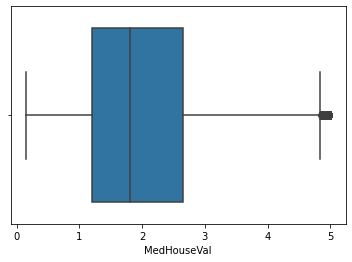

In [14]:
sns.boxplot(x='MedHouseVal', data=train_df)


<AxesSubplot:xlabel='MedInc'>

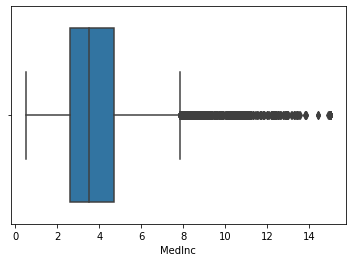

In [15]:
sns.boxplot(x='MedInc', data=train_df)
#MedHouseVal

<AxesSubplot:xlabel='MedHouseVal'>

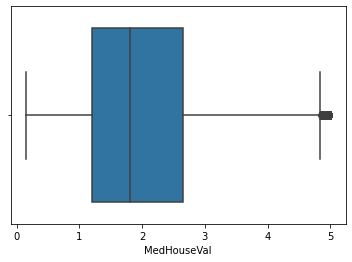

In [16]:
sns.boxplot(x='MedHouseVal', data=train_df)

<AxesSubplot:xlabel='HouseAge'>

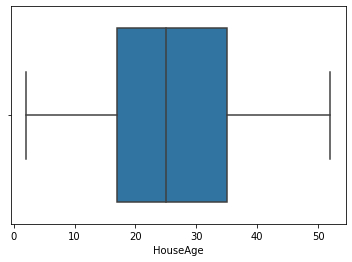

In [17]:
sns.boxplot(x='HouseAge', data=train_df)

<AxesSubplot:xlabel='AveRooms'>

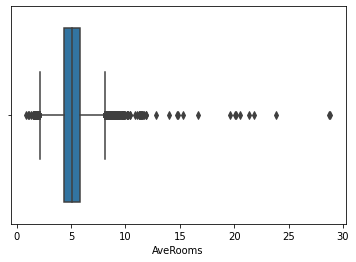

In [18]:

sns.boxplot(x='AveRooms', data=train_df)

<AxesSubplot:xlabel='AveBedrms'>

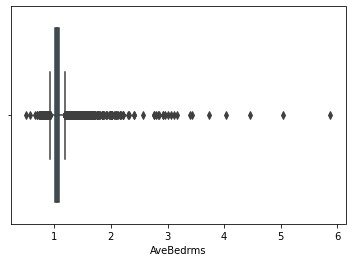

In [19]:

sns.boxplot(x='AveBedrms', data=train_df)

<AxesSubplot:xlabel='Population'>

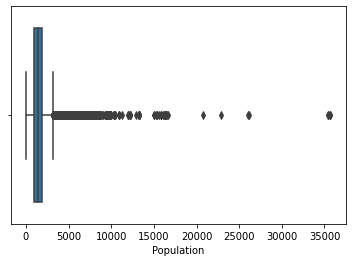

In [20]:

sns.boxplot(x='Population', data=train_df)

<AxesSubplot:xlabel='AveOccup'>

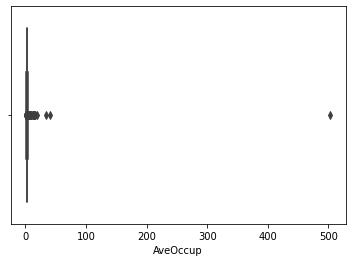

In [21]:

sns.boxplot(x='AveOccup', data=train_df)

# Modelling

## Baseline Model

In [22]:
# split into train and validation sets
X_train = train_df.copy().drop(columns=['MedHouseVal'])
y_train = train_df.copy()['MedHouseVal']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [23]:
#assume mean train price for all MedHouseVal
train_mean_price = train_df['MedHouseVal'].mean()
train_mean_price

y_pred_train_baseline = np.full((X_train.shape[0], 1), train_mean_price, dtype=float)
y_pred_val_baseline = np.full((X_val.shape[0], 1), train_mean_price, dtype=float)
y_pred_test_baseline = np.full((test_df.shape[0], 1), train_mean_price, dtype=float)

y_pred_test_baseline.shape, y_pred_val_baseline.shape

((24759, 1), (7428, 1))

In [24]:
print(f'y_val:{type(y_val)}::{y_val.shape}, y_pred_val_baseline:{type(y_pred_val_baseline)}::{y_pred_val_baseline.shape}')
val_baseline_rmse = mean_squared_error(y_val, y_pred_val_baseline, squared=False)
print(f'val_baseline_rmse: {val_baseline_rmse}')

y_val:<class 'pandas.core.series.Series'>::(7428,), y_pred_val_baseline:<class 'numpy.ndarray'>::(7428, 1)
val_baseline_rmse: 1.163672252024052


In [25]:
#build the baseline submission for test set to get score
y_baseline_output = pd.DataFrame({'id':test_df['id'], 'MedHouseVal':y_pred_test_baseline[:,0]})
y_baseline_output
y_baseline_output.to_csv(f'{data_path}/playground-series-s3e1/y_baseline_output.csv', index=False)
# Score: 1.15399

## H2O AutoML

In [26]:
train_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
id,,,,,,,,,
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [27]:
# X_test

In [28]:
# X_val_scaled

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

X_test = test_df.copy()
X_test = X_test.drop(columns='id')

# scaler = StandardScaler()
scaler = RobustScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

In [30]:
do_automl = True

if do_automl:
    import h2o
    from h2o.automl import H2OAutoML
    h2o.init()
    aml = H2OAutoML(max_models=20,
                    balance_classes=False, 
                    exploitation_ratio=.1,
                    stopping_metric = 'rmse', 
                    stopping_rounds = 5,
                    exclude_algos = ['DeepLearning']
                   )

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 day 18 hours 45 mins
H2O_cluster_timezone:,Europe/Belgrade
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,26 days
H2O_cluster_name:,H2O_from_python_dbd_b2xmk8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,541 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [31]:
# X_train_scaled

In [32]:
# y_train

In [33]:
# y_val

In [34]:
# X_train_with_target.isna().sum()
# X_train_with_target['MedHouseVal'].mean(), X_val_with_target['MedHouseVal'].mean()

In [35]:
def _convert_h2oframe_to_numeric(h2o_frame, training_columns):
    for column in training_columns:
        h2o_frame[column] = h2o_frame[column].asnumeric()
    return h2o_frame

if do_automl:

    X_train_with_target = X_train_scaled.copy()
    X_train_with_target['MedHouseVal'] = y_train
    h2o_train = h2o.H2OFrame(X_train_with_target)
    h2o_train = _convert_h2oframe_to_numeric(h2o_train, X_train_with_target.columns)

    X_val_with_target = X_val_scaled.copy()
    X_val_with_target['MedHouseVal'] = y_val
    h2o_val = h2o.H2OFrame(X_val_with_target)
    h2o_val = _convert_h2oframe_to_numeric(h2o_val, X_val_with_target.columns)
    
    aml.train(training_frame=h2o_train, y='MedHouseVal', )#, validation_frame=h2o_val)
    
    lb = aml.leaderboard
    lb.head(rows=lb.nrows)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


In [36]:
# X_val_with_target.dtypes, X_train_with_target.dtypes

In [37]:
# if do_automl:
#     best_model_h2o = aml.get_best_model()
#     model_performance_h2o = best_model_h2o.model_performance(h2o_val)
#     print(model_performance_h2o)

In [38]:
if do_automl:
    
    best_model_h2o = aml.get_best_model()
    y_val_pred = (best_model_h2o.predict(h2o.H2OFrame(X_val_scaled))).as_data_frame()

    val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
    print(f'val_rmse: {val_rmse}')    


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
val_rmse: 0.5744572435330313


In [39]:
if do_automl:
        
    y_pred_best_model = best_model_h2o.predict(h2o.H2OFrame(X_test_scaled))
    y_pred_best_model_df = y_pred_best_model.as_data_frame()
    y_pred_best_model_df.columns = ['MedHouseVal']
    y_pred_best_model_df['id'] = test_df['id']    
    
    y_pred_best_model_df.to_csv(f'{data_path}/playground-series-s3e1/h2o_pred_robust.csv', index=False)
    
    print('RESULT (NO SCALING - 10 models): Public score: 0.56811, Private score: 0.56553')
    print('RESULT (MinMaxScaler - 3 models): Public Score: 0.57088 Private score: 0.5686')
    print('RESULT (RobustScaler - 3 models): Public Score: 0.57224 Private score: 0.56822')
    print('RESULT (RobustScaler - 10 models): ')
    



Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
RESULT (NO SCALING - 10 models): Public score: 0.56811, Private score: 0.56553
RESULT (MinMaxScaler - 3 models): Public Score: 0.57088 Private score: 0.5686
RESULT (RobustScaler - 3 models): Public Score: 0.57224 Private score: 0.56822
RESULT (NO SCALING - 100 models): 


## Neural Network

In [40]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import cast
from tensorflow.keras.metrics import RootMeanSquaredError

def initialize_model():
    model = models.Sequential()
    
    model.add(layers.Dense(250, activation='relu', input_dim=X_train.shape[-1]))
    # model.add(layers.Dropout(.1))
    model.add(layers.Dense(250, activation='relu'))
    # model.add(layers.Dropout(.1))
    model.add(layers.Dense(125, activation='relu'))
    # model.add(layers.Dropout(.1))
    model.add(layers.Dense(1, activation='linear'))
       
    return model

def compile_model(model, name):
    
    model.compile(loss='mse',
                 optimizer=name,
                 metrics=[RootMeanSquaredError()])

In [41]:
from tensorflow.keras.callbacks import EarlyStopping


import matplotlib.pyplot as plt

best_test_rmse = None
best_nn_model = None
optimizers = ['adam']#, 'sgd', 'adadelta', 'adagrad', 'rmsprop']

y_train_tensor = tf.cast(y_train , dtype=tf.float32)
y_val_tensor = tf.cast(y_val , dtype=tf.float32)

for optimizer in optimizers:
    model = initialize_model()

    # optimizer = 'adam'
    compile_model(model, optimizer)

    #optimize for validation accuracy
    es = EarlyStopping(patience=10, restore_best_weights=True, monitor='val_root_mean_squared_error')

    history = model.fit(X_train, 
                        y_train_tensor,
                        validation_data=(X_val, y_val_tensor),
                        epochs=50,
                        batch_size=8,
                        callbacks = [es],
                        verbose=0,
                       )
        
    test_rmse = model.evaluate(X_val, y_val_tensor)[1]
    if (best_test_rmse is None) or (test_rmse > best_test_rmse):
        best_test_rmse = test_rmse
        best_nn_model = model

    print(f'{optimizer}:: train_root_mean_squared_error: {np.mean(history.history["root_mean_squared_error"])}, val_root_mean_squared_error: {np.mean(history.history["val_root_mean_squared_error"])}, best_test_rmse: {best_test_rmse}')


2023-02-01 15:41:57.598046: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


233/233 [==============================] - 0s 412us/step - loss: 0.5075 - root_mean_squared_error: 0.7124
adam:: train_root_mean_squared_error: 0.9980161721291749, val_root_mean_squared_error: 0.8067004784293796, best_test_rmse: 0.7123927474021912


In [42]:
test_df.head()
X_test = test_df.copy().drop(columns='id')

In [43]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.9699,25.0,4.449514,1.073580,1230.0,2.682510,37.30,-121.92
1,3.3897,15.0,4.064272,1.127789,1358.0,2.005764,37.33,-121.82
2,3.1773,12.0,4.953069,1.059172,1504.0,2.553314,33.00,-117.08
3,4.2566,28.0,5.245509,1.079805,1543.0,2.835846,38.49,-121.52
4,3.5072,23.0,4.285714,1.090047,983.0,2.000000,37.30,-121.96


In [44]:
y_pred_nn_best_model = best_nn_model.predict(X_test)
y_pred_nn_best_model_df = pd.DataFrame(y_pred_nn_best_model)
y_pred_nn_best_model_df.columns = ['MedHouseVal']
y_pred_nn_best_model_df['id'] = test_df['id']    

y_pred_nn_best_model_df.to_csv(f'{data_path}/playground-series-s3e1/nn_pred.csv', index=False)

774/774 [==============================] - 0s 322us/step


In [45]:
y_pred_nn_best_model_df

,MedHouseVal,id
0,0.806922,37137
1,0.988457,37138
2,4.113534,37139
3,3.941262,37140
4,2.285804,37141
...,...,...
24754,1.720855,61891
24755,2.029697,61892
24756,1.593044,61893
24757,3.737548,61894


In [46]:
print (np.__version__)
print (np.__path__)

1.24.1
['/Users/dbd/miniconda/envs/tf_kaggle/lib/python3.10/site-packages/numpy']


In [47]:
#drop some extreme outliers
print(f'train_df: {train_df.shape}')
# train_df = train_df[train_df['AveOccup'] < 100]
print(f'train_df: {train_df.shape}')

train_df: (37137, 9)
train_df: (37137, 9)


In [48]:
# X_train = X_train.reset_index(drop=True)
X_train.shape, y_train.shape

((29709, 8), (29709,))